Plot function

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_to_notebook(time_sec,in_signal,n_samples,out_signal=None):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-',label='Input signal')
    if out_signal is not None:
        plt.plot(time_sec[:n_samples]*1e6,out_signal[:n_samples],'g-',linewidth=2,label='FIR output')
    plt.legend()
    

Input signal

Number of samples:  16000


<IPython.core.display.Javascript object>


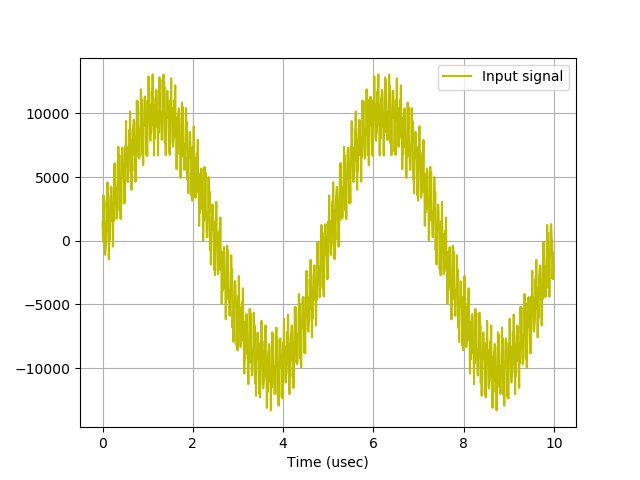

In [3]:
import numpy as np

# Total time
T = 0.00016 #Problem with buffer size above 16K???
# Sampling frequency
fs = 100e6
# Number of samples
n = int(T * fs)
# Time vector in seconds
t = np.linspace(0, T, n, endpoint=False)
# Samples of the signal
samples = 10000*np.sin(0.2e6*2*np.pi*t) + 1500*np.cos(46e6*2*np.pi*t) + 2000*np.sin(12e6*2*np.pi*t)
# Convert samples to 32-bit integers
samples = samples.astype(np.int32)
print('Number of samples: ',len(samples))

# Plot signal to the notebook
plot_to_notebook(t,samples,1000)

Software FIR filter

Software FIR execution time:  0.010794401168823242


<IPython.core.display.Javascript object>


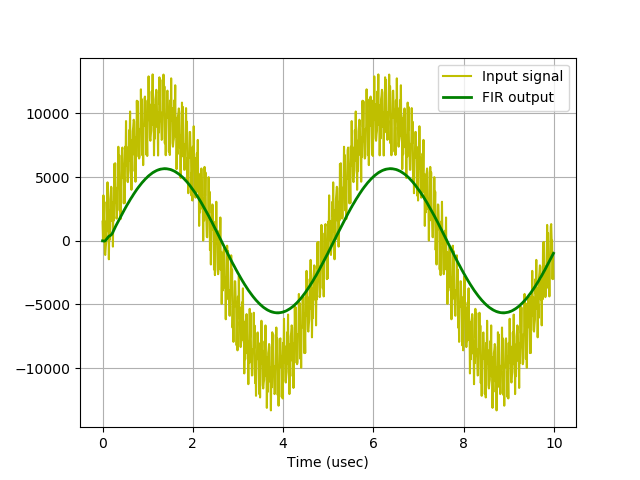

In [4]:
from scipy.signal import lfilter

coeffs = [-255,-260,-312,-288,-144,153,616,1233,1963,2739,3474,4081,4481,4620,4481,4081,3474,2739,1963,1233,616,153,-144,-288,-312,-260,-255]

import time
start_time = time.time()
sw_fir_output = lfilter(coeffs,70e3,samples)
stop_time = time.time()
sw_exec_time = stop_time - start_time
print('Software FIR execution time: ',sw_exec_time)

# Plot the result to notebook
plot_to_notebook(t,samples,1000,out_signal=sw_fir_output)

Hardware filter - load overlay,  point to DMA

Hardware FIR execution time:  0.0007956027984619141
Hardware acceleration factor:  13.567575666766556


<IPython.core.display.Javascript object>


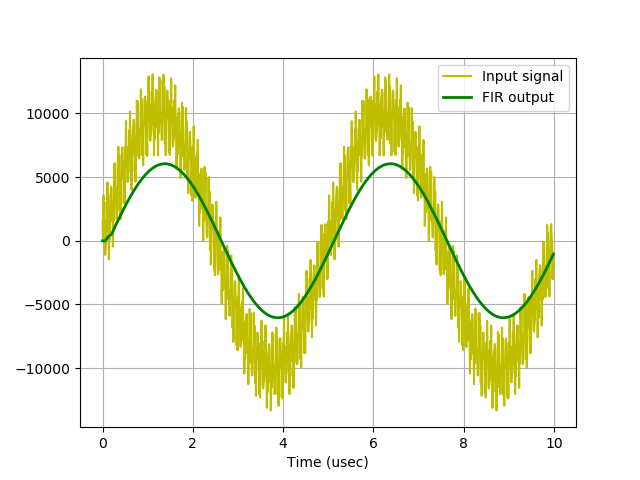

In [5]:
from pynq import Overlay
import numpy as np
# Load the overlay
overlay = Overlay('/home/xilinx/pynq/overlays/fir_accel/fir_accel.bit')
import dma
dma.DMABufSet(list(samples))
# Trigger the DMA transfer and wait for the result
import time
start_time = time.time()
dma.DMATransfer()
stop_time = time.time()
out_signal=dma.DMABufGet()
hw_exec_time = stop_time-start_time
print('Hardware FIR execution time: ',hw_exec_time)
print('Hardware acceleration factor: ',sw_exec_time / hw_exec_time)
plot_to_notebook(t,samples,1000,out_signal)
